In [1]:
import pandas as pd
import json
import numpy as np

from itertools import product
from tqdm.notebook import tqdm

In [2]:
with open('telco_directed.json') as f:
    data= json.load(f)

In [3]:
#edge_list
location_list = list(product(data['locations'], data['locations']))

values = np.array(data['data'])

df = pd.DataFrame()
df['src'] = [i[0] for i in location_list]
df['dst'] = [i[1] for i in location_list]

for idx, date in enumerate(data['dates']):
    df[date] = values[:,idx]

/tmp/ipykernel_196881/2829860959.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[date] = values[:,idx]


In [4]:
df = df.melt(id_vars=['src','dst'],var_name='day')

In [5]:
df['inversed'] = 1 / df.value
df.inversed = df.inversed / np.max(df.inversed[df.inversed != np.inf])

In [6]:
import networkx as nx

In [7]:
df

,src,dst,day,value,inversed
0,Aabenraa,Aabenraa,2020-02-01 00:00:00,323162.099102,0.000015
1,Aabenraa,Aalborg,2020-02-01 00:00:00,405.268442,0.012338
2,Aabenraa,Albertslund,2020-02-01 00:00:00,0.000000,inf
3,Aabenraa,Allerød,2020-02-01 00:00:00,0.000000,inf
4,Aabenraa,Assens,2020-02-01 00:00:00,690.133217,0.007245
...,...,...,...,...,...
4955659,Ærø,Vesthimmerland,2021-06-30 00:00:00,0.000000,inf
4955660,Ærø,Viborg,2021-06-30 00:00:00,0.000000,inf
4955661,Ærø,Vordingborg,2021-06-30 00:00:00,0.000000,inf
4955662,Ærø,Århus,2021-06-30 00:00:00,0.000000,inf


In [9]:
days, dist = [], []
for day in df.day.unique():
    print(day)
    
    subset = df[df.day == day].copy()
    subset = subset[['src', 'dst', 'inversed']]
    #subset.drop('day', inplace=True, axis=1)
    
    #subset_non_zero = subset #subset[subset.value != 0].copy()
    #subset_non_zero.value = 1/subset_non_zero.value
    G = nx.DiGraph()
    G.add_weighted_edges_from(subset.values)
    dist.append(nx.average_shortest_path_length(G, weight="weight"))
    days.append(day)

2020-02-01 00:00:00
2020-02-02 00:00:00
2020-02-03 00:00:00
2020-02-04 00:00:00
2020-02-05 00:00:00
2020-02-06 00:00:00
2020-02-07 00:00:00
2020-02-08 00:00:00
2020-02-09 00:00:00
2020-02-10 00:00:00
2020-02-11 00:00:00
2020-02-12 00:00:00
2020-02-13 00:00:00
2020-02-14 00:00:00
2020-02-15 00:00:00
2020-02-16 00:00:00
2020-02-17 00:00:00
2020-02-18 00:00:00
2020-02-19 00:00:00
2020-02-20 00:00:00
2020-02-21 00:00:00
2020-02-22 00:00:00
2020-02-23 00:00:00
2020-02-24 00:00:00
2020-02-25 00:00:00
2020-02-26 00:00:00
2020-02-27 00:00:00
2020-02-28 00:00:00
2020-02-29 00:00:00
2020-03-01 00:00:00
2020-03-02 00:00:00
2020-03-03 00:00:00
2020-03-04 00:00:00
2020-03-05 00:00:00
2020-03-06 00:00:00
2020-03-07 00:00:00
2020-03-08 00:00:00
2020-03-09 00:00:00
2020-03-10 00:00:00
2020-03-11 00:00:00
2020-03-12 00:00:00
2020-03-13 00:00:00
2020-03-14 00:00:00
2020-03-15 00:00:00
2020-03-16 00:00:00
2020-03-17 00:00:00
2020-03-18 00:00:00
2020-03-19 00:00:00
2020-03-20 00:00:00
2020-03-21 00:00:00


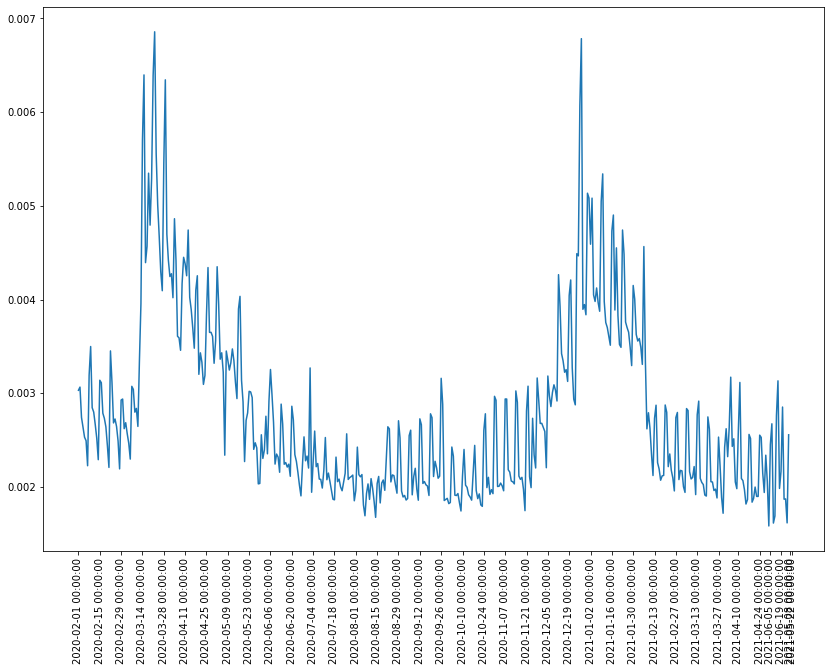

In [10]:
import matplotlib.pylab as plt
%matplotlib inline
dist = np.array(dist)
days = np.array(days)
#plt.hist(dist[dist < 1])
plt.figure(figsize=(14, 10))
plt.plot(days[dist < 1], dist[dist < 1])
plt.xticks(days[::14], rotation=90);

In [20]:
mun = pd.read_csv('../data/Municipality_cases_time_series.csv', sep=';')
mun.set_index('SampleDate', inplace=True)

array(['2021-03-28 00:00:00', '2021-04-28 00:00:00',
       '2021-04-29 00:00:00', '2021-04-30 00:00:00',
       '2021-05-01 00:00:00', '2021-05-02 00:00:00',
       '2021-05-03 00:00:00', '2021-05-04 00:00:00',
       '2021-05-05 00:00:00', '2021-05-06 00:00:00',
       '2021-05-07 00:00:00', '2021-05-08 00:00:00',
       '2021-05-09 00:00:00', '2021-05-10 00:00:00',
       '2021-05-11 00:00:00', '2021-05-12 00:00:00',
       '2021-05-13 00:00:00', '2021-05-14 00:00:00',
       '2021-05-15 00:00:00', '2021-05-16 00:00:00',
       '2021-05-17 00:00:00', '2021-05-18 00:00:00',
       '2021-05-19 00:00:00', '2021-05-20 00:00:00',
       '2021-05-21 00:00:00', '2021-05-22 00:00:00',
       '2021-05-23 00:00:00', '2021-05-24 00:00:00',
       '2021-05-25 00:00:00', '2021-05-26 00:00:00',
       '2021-05-27 00:00:00', '2021-05-28 00:00:00',
       '2021-05-29 00:00:00', '2021-05-31 00:00:00',
       '2021-06-01 00:00:00', '2021-06-03 00:00:00',
       '2021-06-07 00:00:00', '2021-06-08 00:0

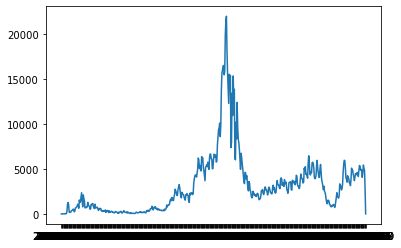

In [29]:
mun['total'] = mun.sum(axis=1)
plt.plot(mun.index, mun.total)
exclude_days = days[dist > 99]

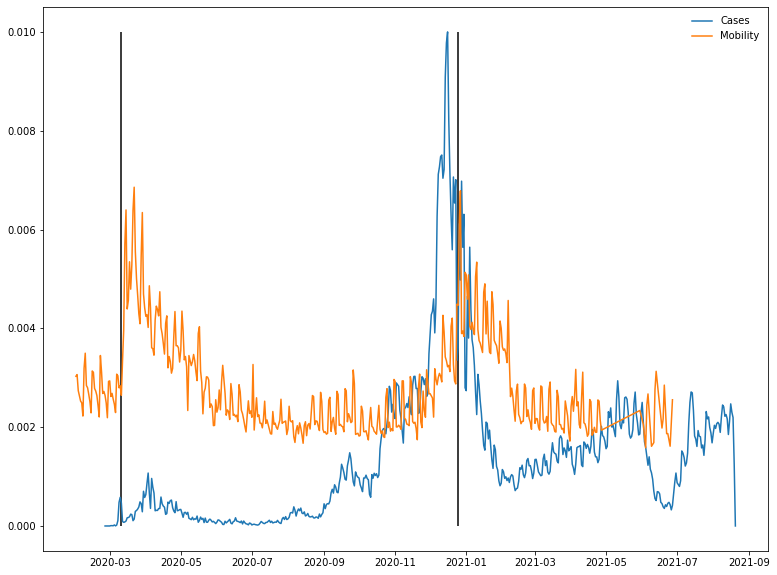

In [60]:
plt.figure(figsize=(13, 10))
plt.plot(pd.to_datetime(mun.index), mun.total / max(mun.total) / 1e2)
plt.plot(pd.to_datetime(days[dist < 99]), dist[dist < 99])
plt.legend(('Cases', 'Mobility'), loc='best', frameon=False)
doi = pd.to_datetime(['2020-03-11', '2020-12-25'])
plt.vlines(doi, 0, 0.01, color='k');

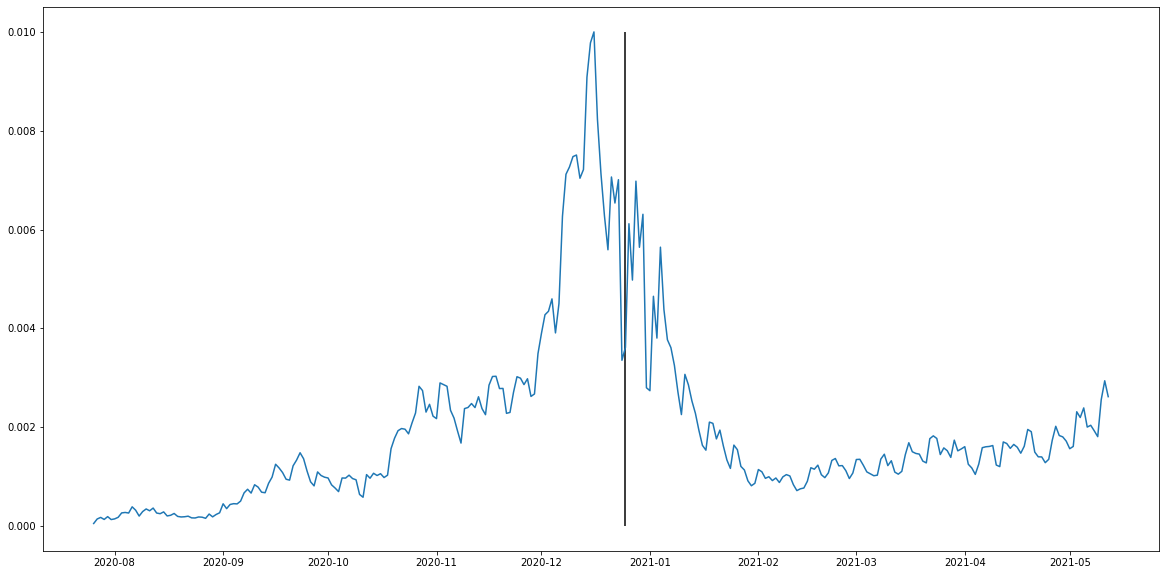

In [110]:
plt.figure(figsize=(20, 10))
plt.plot(pd.to_datetime(mun.index)[150:-100], mun.total[150:-100] / max(mun.total) / 1e2)
doi = pd.to_datetime(['2020-03-11', '2020-12-25'])
plt.vlines(doi[1], 0, 0.01, color='k');

In [51]:
adm = pd.read_csv('../data/Newly_admitted_over_time.csv', sep=';')

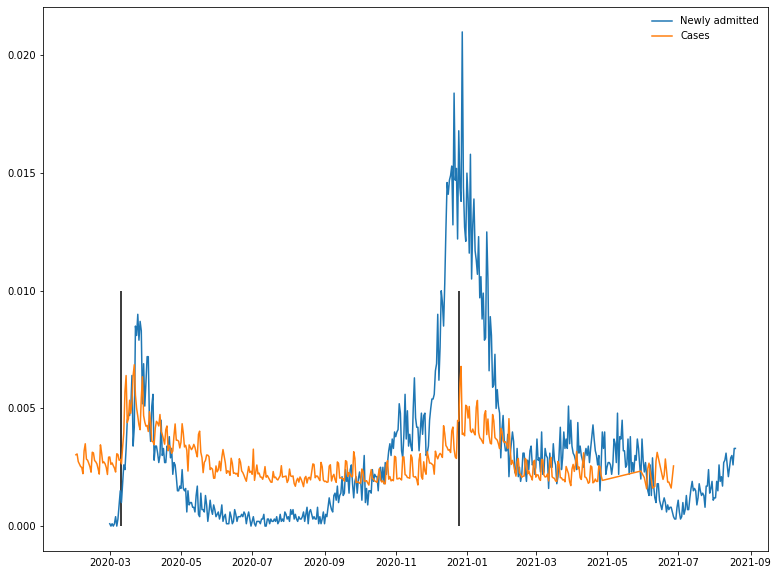

In [61]:
plt.figure(figsize=(13, 10))
plt.plot(pd.to_datetime(adm.Dato), adm.Total / 1e4)
plt.plot(pd.to_datetime(days[dist < 99]), dist[dist < 99])
plt.legend(('Newly admitted', 'Cases', 'Mobility'), loc='best', frameon=False)
plt.vlines(doi, 0, 0.01, color='k');

In [65]:
import datetime
doi_7d = doi + datetime.timedelta(days=7)

In [166]:
def get_average(time, series, lag, t0):
    time = pd.to_datetime(time)
    t1 = t0 + datetime.timedelta(days=lag)
    if lag > 0:
        idx = (time <= t1) & (time >= t0)
    else:
        idx = (time >= t1) & (time <= t0)
    return np.mean(series[idx])

def get_perc(time, series, lags, t0):
    a = get_average(time, series, lags[0], t0)
    b = get_average(time, series, lags[1], t0)
    return (b-a)/a*100

print('Avg_short_path(1):', get_perc(days, dist, (-7, 7), doi[0]))
print('Case(1):', get_perc(mun.index, mun.total, (7, 14), doi[0]))

print('Avg_short_path(2):', get_perc(days, dist, (-7, 7), doi[1]))
print('Case(2):', get_perc(mun.index, mun.total, (7, 14), doi[1]))

Avg_short_path(1): 67.31220821069076
Case(1): 19.48459383753501
Avg_short_path(2): 33.300460653367445
Case(2): -7.038222118796905


In [117]:
tests = pd.read_csv('../data/Municipality_tested_persons_time_series.csv', sep=';')
tests.set_index('PrDate_adjusted', inplace=True)
tests['total'] = tests.sum(axis=1)

(18567.0, 18718.0)

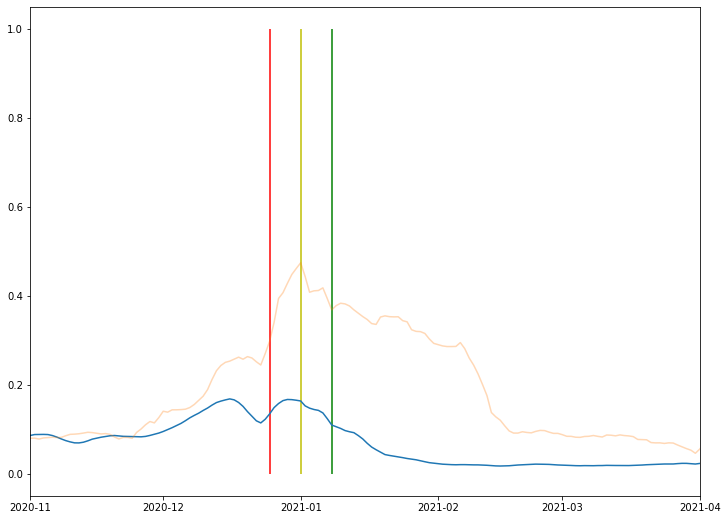

In [197]:
case_per_test = mun.total / tests.total
smoothed = case_per_test.rolling(window=7).mean()
plt.figure(figsize=(12, 9))
plt.plot(pd.to_datetime(tests.index), smoothed)
plt.plot(pd.to_datetime(days[dist < 99]), pd.Series(dist[dist < 99] / max(dist[dist < 99]) - 0.25).rolling(window=7).mean(), alpha=0.3)
plt.vlines(doi, 0, 1, color='r');
plt.vlines(doi[0] + datetime.timedelta(days=7), 0, 1, color='y');
plt.vlines(doi[0] + datetime.timedelta(days=14), 0, 1, color='g');
plt.vlines(doi[1] + datetime.timedelta(days=7), 0, 1, color='y');
plt.vlines(doi[1] + datetime.timedelta(days=14), 0, 1, color='g');
plt.xlim(*pd.to_datetime(['2020-11', '2021-04']))

In [195]:
print('Smoothed case/tests(1):', get_perc(tests.index, smoothed, (7, 14), doi[0]))
print('Avg_short_path(1):', get_perc(days, dist, (-7, 7), doi[0]))
#print(get_perc(tests.index, smoothed, (7, 14), doi[0])/get_perc(days, dist, (-7, 7), doi[0]))

print()
print('Smoothed case/tests(2):', get_perc(tests.index, smoothed, (7, 14), doi[1]))
print('Avg_short_path(2):', get_perc(days, dist, (-7, 7), doi[1]))
#print( get_perc(tests.index, smoothed, (7, 14), doi[1])/get_perc(days, dist, (-7, 7), doi[1]))

Smoothed case/tests(1): -21.24947796248188
Avg_short_path(1): 67.31220821069076

Smoothed case/tests(2): -6.437489700438456
Avg_short_path(2): 33.300460653367445


In [214]:
baseline_2 = 0.085  # Baseline for smoothed case/tests before 2nd lockdown
smoothed_2nd = (smoothed - baseline_2)/baseline_2 * 100

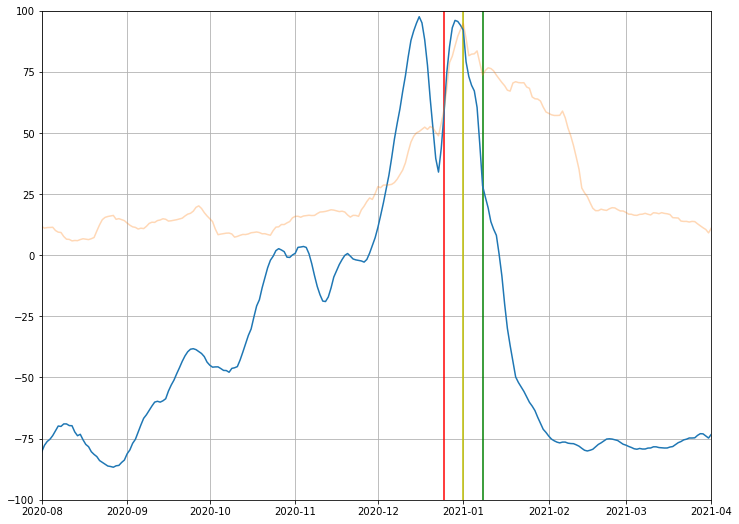

In [223]:
plt.figure(figsize=(12, 9))
plt.plot(pd.to_datetime(tests.index), smoothed_2nd)
plt.plot(pd.to_datetime(days[dist < 99]), pd.Series(dist[dist < 99] / max(dist[dist < 99]) - 0.25).rolling(window=7).mean() * 200, alpha=0.3)
plt.vlines(doi, -100, 100, color='r');
plt.vlines(doi[0] + datetime.timedelta(days=7), -100, 100, color='y');
plt.vlines(doi[0] + datetime.timedelta(days=14), -100, 100, color='g');
plt.vlines(doi[1] + datetime.timedelta(days=7), -100, 100, color='y');
plt.vlines(doi[1] + datetime.timedelta(days=14), -100, 100, color='g');
plt.xlim(*pd.to_datetime(['2020-8', '2021-04']))
plt.ylim(-100, 100)
plt.grid()